In [24]:
import cv2
import numpy as np

In [25]:
# Load images
teddyL = cv2.imread("teddyL.pgm", cv2.IMREAD_GRAYSCALE)
teddyR = cv2.imread("teddyR.pgm", cv2.IMREAD_GRAYSCALE)
disp2 = cv2.imread("disp2.pgm", cv2.IMREAD_GRAYSCALE)

In [26]:
# Rank transform
def rank_transform_5x5(arr):
    # Compute the rank transform in 5-by-5 windows
    rank = np.zeros_like(arr)
    for i in range(2, arr.shape[0]-2):
        for j in range(2, arr.shape[1]-2):
            window = arr[i-2:i+3, j-2:j+3].ravel()
            sorted_window = np.sort(window)
            ranks = np.argsort(window)
            rank[i, j] = np.sum(ranks == 12)
    return rank

rankL = rank_transform_5x5(teddyL)
rankR = rank_transform_5x5(teddyR)

In [27]:
# Set window sizes
win_sizes = [3, 15]

# Initialize disparity map
disparity_map = np.zeros_like(teddyL)

# Set maximum disparity range
max_disparity = 63

# Set boundary conditions
border = max(win_sizes)//2

# Compute disparity map using dynamic programming
def compute_disparity_maps(rank, img):
    for i in range(border, rank.shape[0]-border):
        for j in range(border, rank.shape[1]-border):
            best_match = 0
            best_score = np.inf
            score = 0
            for d in range(max_disparity):
                if j-d < border or score >= best_score:
                    break
                score = 0
                for w in win_sizes:
                    for k in range(-w//2, w//2+1):
                        for l in range(-w//2, w//2+1):
    #                         if rankL[i+k, j+l] != rankR[i+k, j-d+l]:
    #                             score += abs(rankL[i+k, j+l] - rankR[i+k, j-d+l])
                            if i+k < border or i+k >= rank.shape[0]-border or j+l < border or j+l >= rank.shape[1]-border or j-d+l < border or j-d+l >= rank.shape[1]-border:
                                score += 0  # Set score to 0 if any window falls out of the image boundaries
                            elif rankL[i+k, j+l] != img[i+k, j-d+l]:
                                score += abs(rankL[i+k, j+l] - img[i+k, j-d+l])
                if score < best_score:
                    best_score = score
                    best_match = d
            disparity_map[i, j] = best_match

# Normalize disparity map
disparity_map = (disparity_map/max_disparity)*255


In [11]:
# # Compute disparity maps
# disparityL_3 = cv2.absdiff(rankL, teddyL)
# disparityL_15 = cv2.absdiff(rankL, teddyL)
# disparity_3 = cv2.absdiff(rankR, teddyR)
# disparity_15 = cv2.absdiff(rankR, teddyR)

In [28]:
# Aggregate absolute differences of rank in 3x3 and 15x15 windows
window_size = 3
disparityL_3 = cv2.blur(disparity_3, (window_size, window_size))

window_size = 15
disparityL_15 = cv2.blur(disparity_15, (window_size, window_size))


window_size = 3
disparity_3 = cv2.blur(disparity_3, (window_size, window_size))

window_size = 15
disparity_15 = cv2.blur(disparity_15, (window_size, window_size))

In [19]:
# Set out of bounds pixels to black
h, w = teddyR.shape[:2]
disparity_3[:window_size//2, :] = 0
disparity_3[-window_size//2:, :] = 0
disparity_3[:, :window_size//2] = 0
disparity_3[:, w-window_size//2:] = 0

disparity_15[:window_size//2, :] = 0
disparity_15[h-window_size//2:, :] = 0
disparity_15[:, :window_size//2] = 0
disparity_15[:, w-window_size//2:] = 0



h, w = teddyL.shape[:2]
disparityL_3[:window_size//2, :] = 0
disparityL_3[-window_size//2:, :] = 0
disparityL_3[:, :window_size//2] = 0
disparityL_3[:, w-window_size//2:] = 0

disparityL_15[:window_size//2, :] = 0
disparityL_15[h-window_size//2:, :] = 0
disparityL_15[:, :window_size//2] = 0
disparityL_15[:, w-window_size//2:] = 0


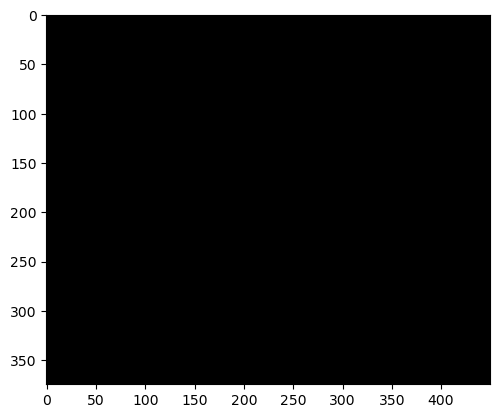

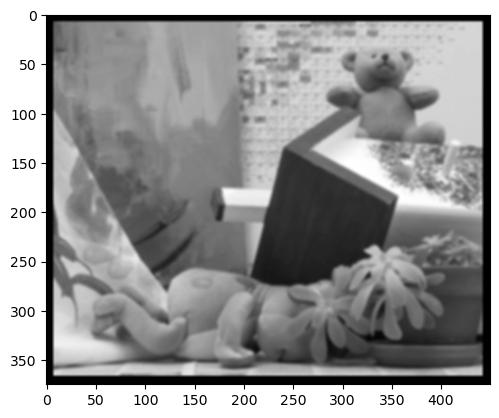

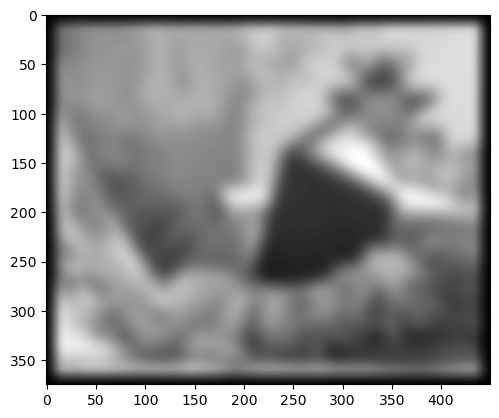

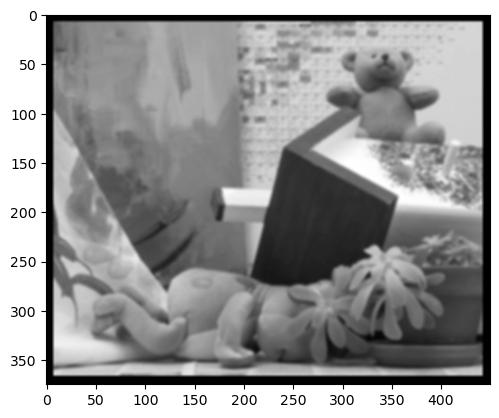

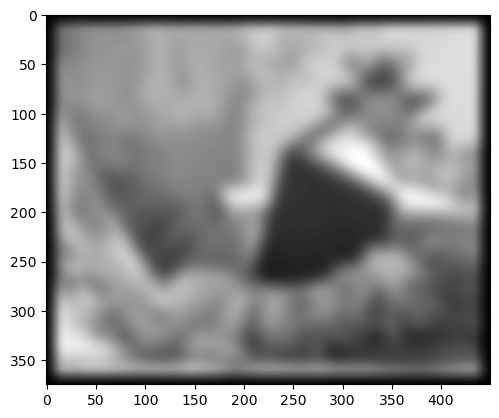

Error rate: 0.9798162962962963


In [29]:
import matplotlib.pyplot as plt

plt.imshow(disparity_map, cmap='gray')
plt.show()
plt.imshow(disparity_3, cmap='gray')
plt.show()
plt.imshow(disparity_15, cmap='gray')
plt.show()

plt.imshow(disparityL_3, cmap='gray')
plt.show()
plt.imshow(disparityL_15, cmap='gray')
plt.show()

# Display resulting disparity maps
#cv2.imshow("Disparity 3x3", disparity_3)
#cv2.imshow("Disparity 15x15", disparity_15)

# Ground truth disparity map
# ground_truth = disp2 / 4
# ground_truth = np.round(ground_truth).astype(np.uint8)

# # Compute error rate
# threshold = 1
# diff = np.abs(disparity_15.astype(np.int32) - ground_truth.astype(np.int32))
# bad_pixels = np.count_nonzero(diff > threshold)
# total_pixels = np.prod(diff.shape)
# error_rate = bad_pixels / total_pixels


gt_disparity_map = np.round(cv2.imread('disp2.pgm', 0).astype(float) / 4).astype(int)
# Compute the error rate
diff = np.abs(disparity_map - gt_disparity_map)
error_rate = np.sum(diff > 1) / np.sum(gt_disparity_map >= 0)



#cv2.imshow("3", disparity_3)
#cv2.imshow("15", disparity_15)

print("Error rate:", error_rate)

In [14]:
# Compute disparity maps
disparityL_3 = cv2.absdiff(teddyL_rank, teddyL)
disparityL_15 = cv2.absdiff(teddyL_rank, teddyL)
disparity_3 = cv2.absdiff(teddyL_rank, teddyR)
disparity_15 = cv2.absdiff(teddyL_rank, teddyR)

# Aggregate absolute differences of rank in 3x3 and 15x15 windows
window_size = 3
disparityL_3 = cv2.blur(disparity_3, (window_size, window_size))

window_size = 15
disparityL_15 = cv2.blur(disparity_15, (window_size, window_size))


window_size = 3
disparity_3 = cv2.blur(disparity_3, (window_size, window_size))

window_size = 15
disparity_15 = cv2.blur(disparity_15, (window_size, window_size))



In [16]:
# Set out of bounds pixels to black
h, w = teddyR.shape[:2]
disparity_3[:window_size//2, :] = 0
disparity_3[-window_size//2:, :] = 0
disparity_3[:, :window_size//2] = 0
disparity_3[:, w-window_size//2:] = 0

disparity_15[:window_size//2, :] = 0
disparity_15[h-window_size//2:, :] = 0
disparity_15[:, :window_size//2] = 0
disparity_15[:, w-window_size//2:] = 0



h, w = teddyL.shape[:2]
disparityL_3[:window_size//2, :] = 0
disparityL_3[-window_size//2:, :] = 0
disparityL_3[:, :window_size//2] = 0
disparityL_3[:, w-window_size//2:] = 0

disparityL_15[:window_size//2, :] = 0
disparityL_15[h-window_size//2:, :] = 0
disparityL_15[:, :window_size//2] = 0
disparityL_15[:, w-window_size//2:] = 0


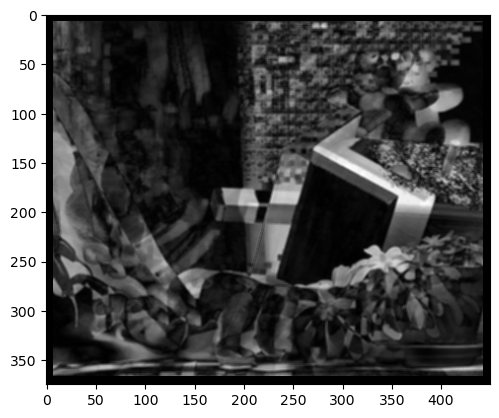

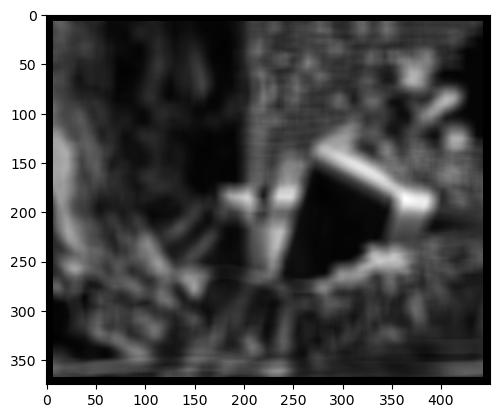

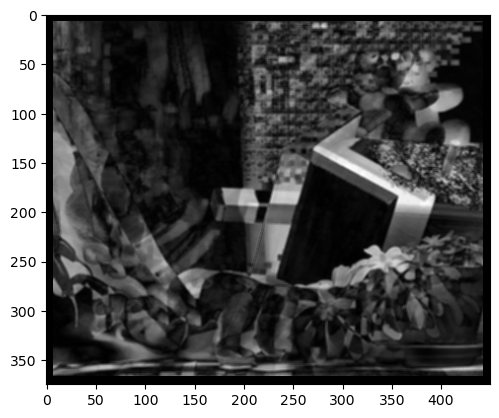

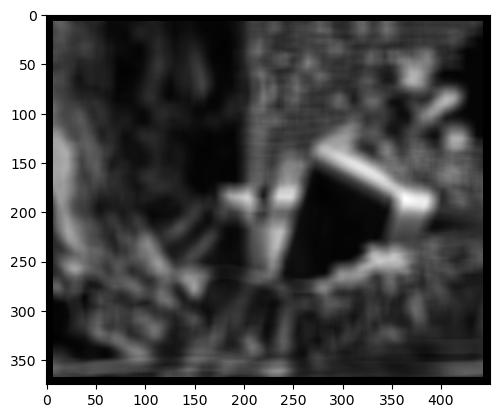

Error rate: 0.9569066666666667


In [19]:

import matplotlib.pyplot as plt
plt.imshow(disparity_3, cmap='gray')
plt.show()
plt.imshow(disparity_15, cmap='gray')
plt.show()

plt.imshow(disparityL_3, cmap='gray')
plt.show()
plt.imshow(disparityL_15, cmap='gray')
plt.show()

# Display resulting disparity maps
#cv2.imshow("Disparity 3x3", disparity_3)
#cv2.imshow("Disparity 15x15", disparity_15)

# Ground truth disparity map
ground_truth = disp2 / 4
ground_truth = np.round(ground_truth).astype(np.uint8)

# Compute error rate
threshold = 1
diff = np.abs(disparity_15.astype(np.int32) - ground_truth.astype(np.int32))
bad_pixels = np.count_nonzero(diff > threshold)
total_pixels = np.prod(diff.shape)
error_rate = bad_pixels / total_pixels

#cv2.imshow("3", disparity_3)
#cv2.imshow("15", disparity_15)

print("Error rate:", error_rate)